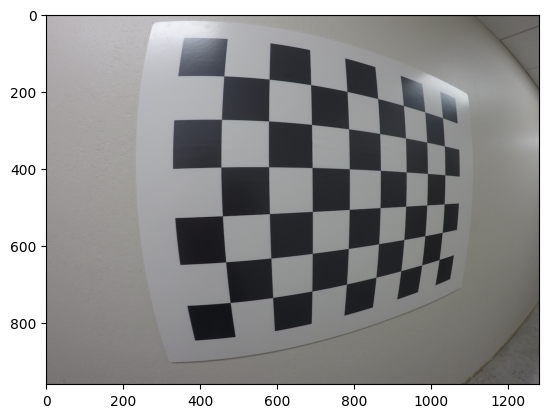

In [52]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in a calibration image
img = mpimg.imread('GOPR0032.jpg')
if img.dtype != np.uint8:
    img = (img * 255).astype(np.uint8)  # Convert to 8-bit

plt.imshow(img)

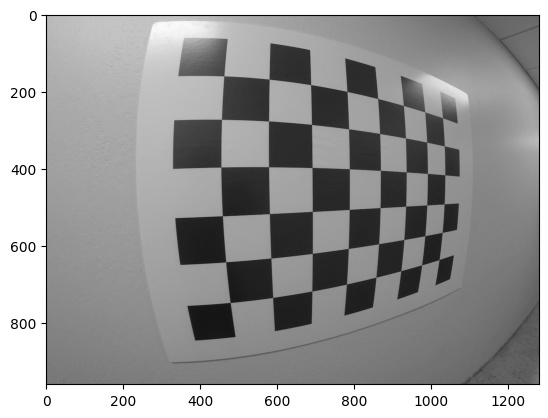

In [53]:
# Array to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ...., (7,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2 ) # x, y  coordinate

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [56]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)


array([[[ 462.5541 ,  161.35435]],

       [[ 579.8831 ,  169.6921 ]],

       [[ 687.8876 ,  184.07695]],

       [[ 782.25793,  201.73709]],

       [[ 862.12164,  220.1853 ]],

       [[ 928.7005 ,  238.08649]],

       [[ 984.37244,  254.6542 ]],

       [[1030.1838 ,  270.0841 ]],

       [[ 456.5541 ,  274.14923]],

       [[ 578.6139 ,  278.18326]],

       [[ 690.1587 ,  287.34586]],

       [[ 786.5488 ,  298.59094]],

       [[ 867.0511 ,  310.931  ]],

       [[ 934.026  ,  322.4645 ]],

       [[ 989.1491 ,  333.13928]],

       [[1035.0569 ,  343.04865]],

       [[ 454.80762,  397.9013 ]],

       [[ 578.5601 ,  396.98193]],

       [[ 691.4437 ,  399.01077]],

       [[ 788.14325,  402.43298]],

       [[ 869.05475,  406.35153]],

       [[ 935.9753 ,  410.45932]],

       [[ 991.0434 ,  414.30936]],

       [[1036.211  ,  418.09845]],

       [[ 458.96585,  524.49445]],

       [[ 580.93396,  518.83203]],

       [[ 692.2226 ,  512.9375 ]],

       [[ 788.0009 ,  507.76

True